# Assignment 3


21BCE9823 - KOMMAREDDY PRANAY NAGA VENKATA SUBBA REDDY



Loading the dataset

In [1]:
import numpy as np
import pandas as pd
import io
from google.colab import files
uploaded=files.upload()
df = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv']))
print(df)

Saving penguins_size.csv to penguins_size.csv
    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213

Univariate Analysis

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt

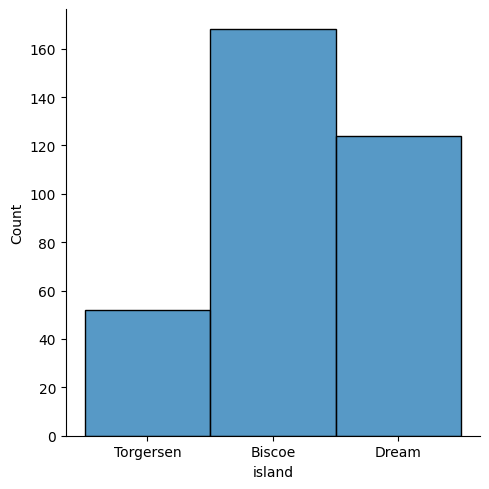

In [3]:
sb.displot(df['island'])

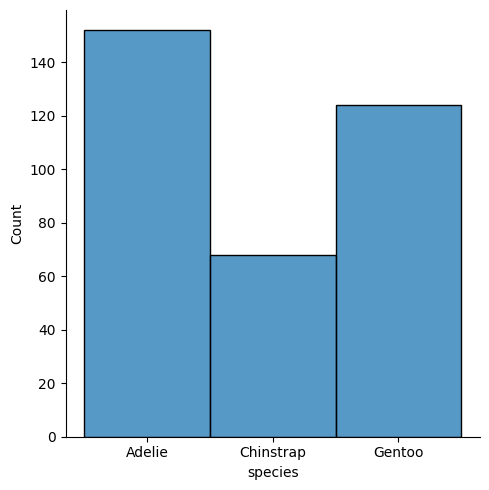

In [4]:
sb.displot(df['species'])

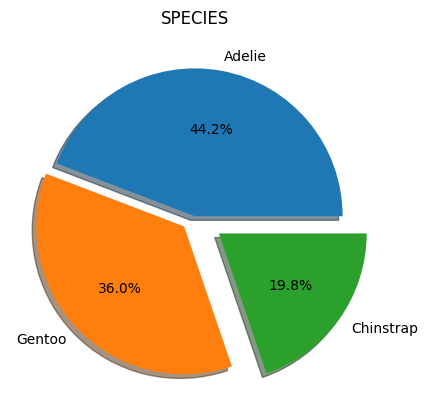

In [5]:
plt.pie(df.species.value_counts() ,  [0,0.1,0.2] , labels = [ 'Adelie' ,  'Gentoo','Chinstrap' ] , autopct ='%1.1f%%',shadow = True,)
plt.title('SPECIES')
plt.show()

<Axes: ylabel='sex'>

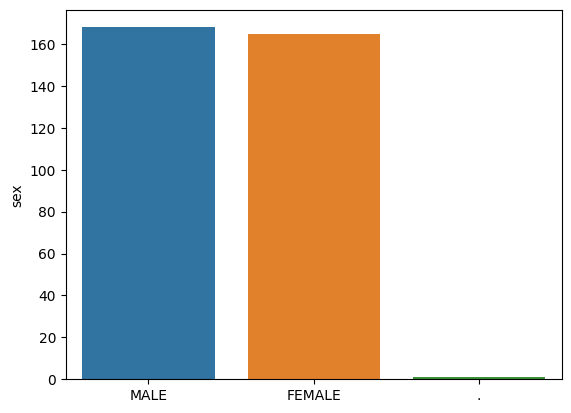

In [6]:
sb.barplot(x =df.sex.value_counts().index,y =df.sex.value_counts() )

Bivariate Analysis

<Axes: xlabel='species', ylabel='island'>

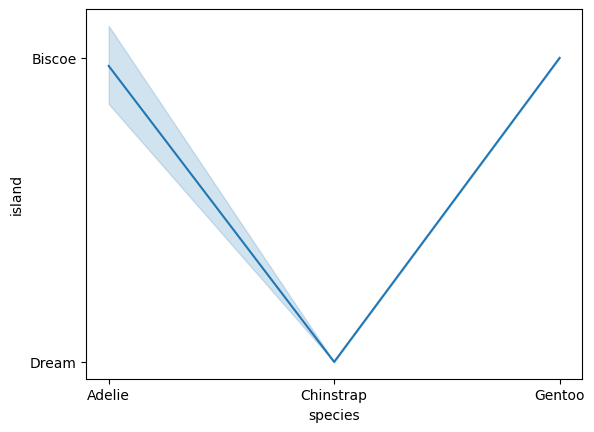

In [7]:
sb.lineplot(x = df['species'],y=df['island'])

<Axes: xlabel='species', ylabel='body_mass_g'>

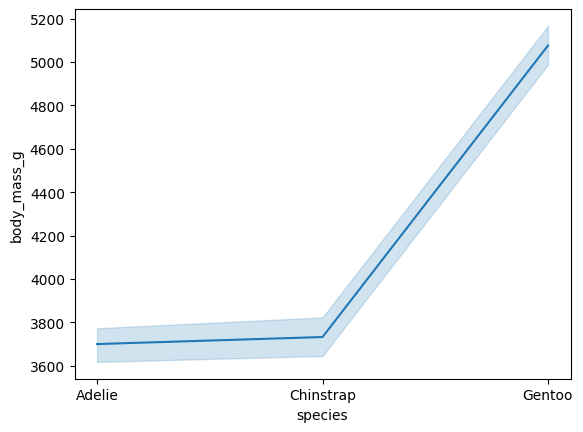

In [8]:
sb.lineplot(x = df['species'],y=df['body_mass_g'])

<Axes: xlabel='culmen_depth_mm', ylabel='body_mass_g'>

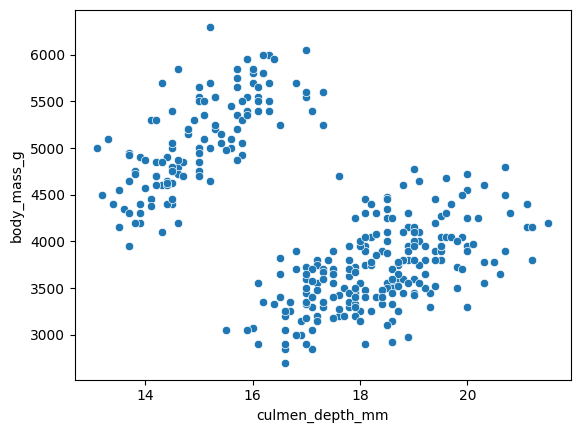

In [9]:
sb.scatterplot(x = df['culmen_depth_mm'],y=df['body_mass_g'])

Multivariate Analysis

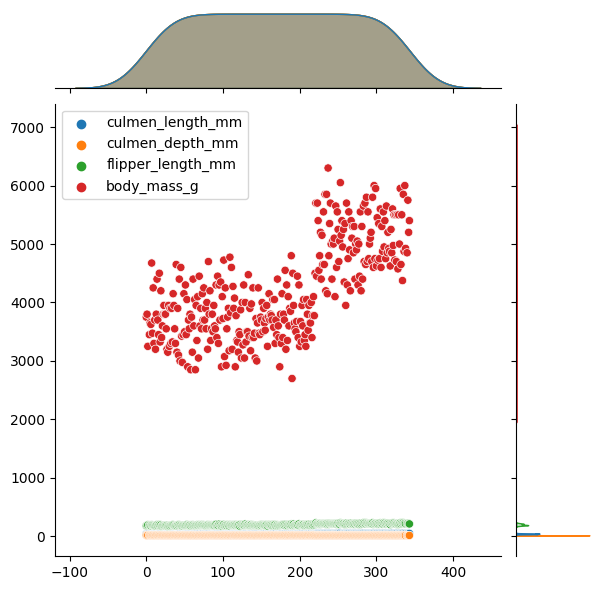

In [10]:
sb.jointplot(data=df)

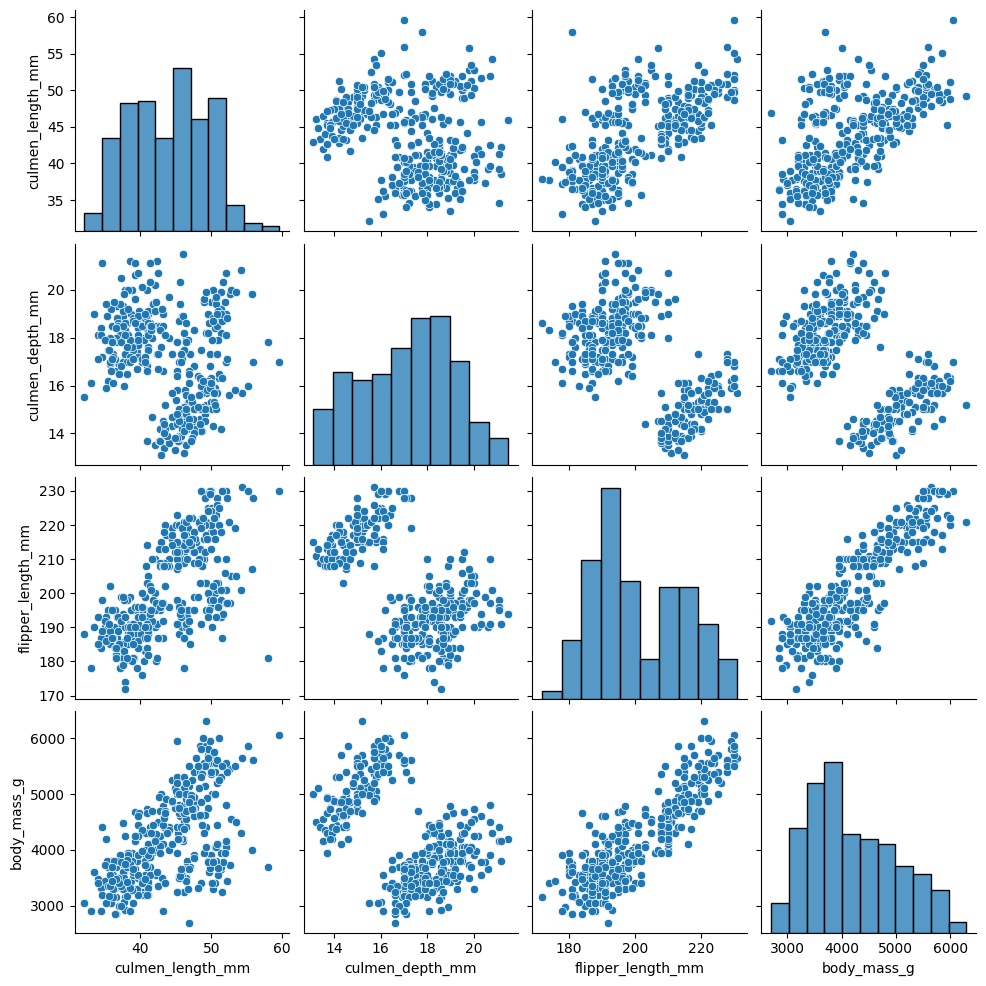

In [11]:
sb.pairplot(df)

<Axes: >

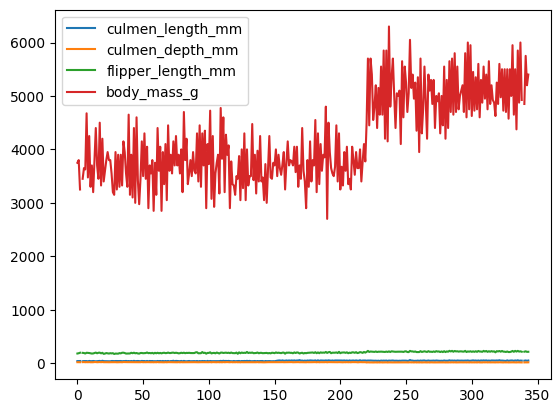

In [12]:
df.plot()

Few descriptive statistics

In [13]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Checking for Null Values

In [15]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [16]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Label Encoding

In [17]:
from sklearn.preprocessing  import LabelEncoder
le = LabelEncoder()

In [18]:
df['sex'] = le.fit_transform(df['sex'])
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,3
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,3
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


Filling Null Values by using Mean

In [19]:
df.fillna(df.mean() , inplace= True)
df

<ipython-input-19-826902893166>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean() , inplace= True)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,2
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,1
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,1
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,3
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,1
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,3
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,1
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,2
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,1


One hot encoding

In [20]:
df_main = pd.get_dummies(df,columns =['species' , 'island'  ])
df_main.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.10000,18.70000,181.000000,3750.000000,2,1,0,0,0,0,1
1,39.50000,17.40000,186.000000,3800.000000,1,1,0,0,0,0,1
2,40.30000,18.00000,195.000000,3250.000000,1,1,0,0,0,0,1
3,43.92193,17.15117,200.915205,4201.754386,3,1,0,0,0,0,1
4,36.70000,19.30000,193.000000,3450.000000,1,1,0,0,0,0,1


Outliers

<Axes: >

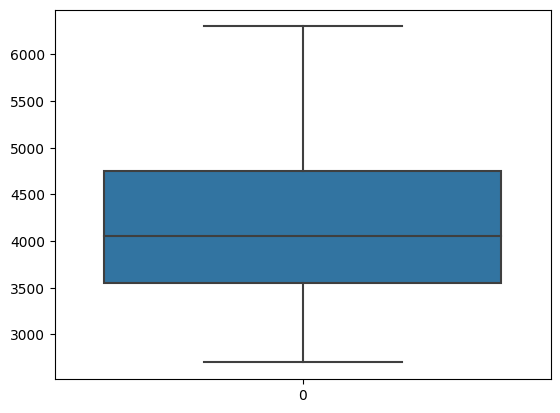

In [21]:
sb.boxplot(df['body_mass_g'])

<Axes: >

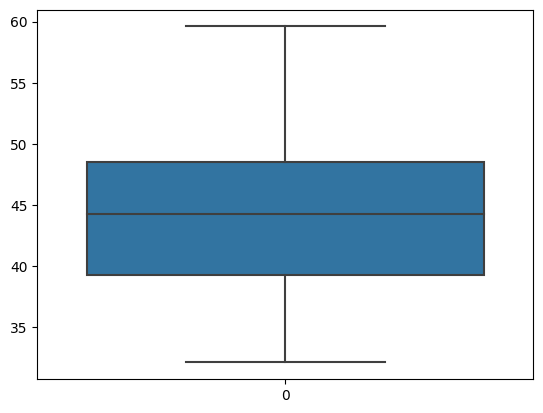

In [22]:
sb.boxplot(df['culmen_length_mm'])

<Axes: >

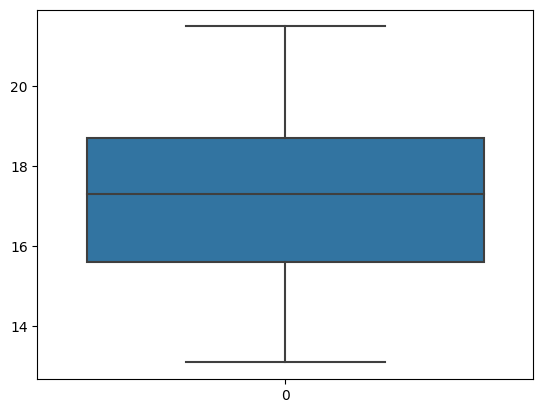

In [23]:
sb.boxplot(df['culmen_depth_mm'])

<Axes: >

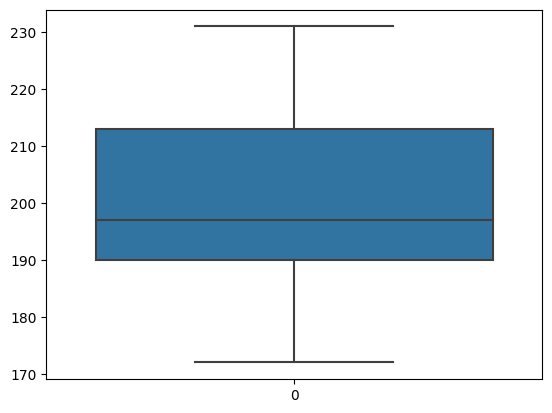

In [24]:
sb.boxplot(df['flipper_length_mm'])

Correlation of independent variables with target

In [25]:
df_main.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110,0.264024,-0.834277,0.448530,0.490869,0.238622,0.033950,-0.378494
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,0.316379,0.537305,0.320468,-0.821550,-0.630442,0.455604,0.269073
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.193476,-0.692055,-0.180520,0.865530,0.609855,-0.420557,-0.287321
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.340402,-0.554721,-0.291351,0.815411,0.625523,-0.459651,-0.256785
sex,0.264024,0.316379,0.193476,0.340402,1.000000,0.024857,-0.038745,0.006427,-0.013800,-0.036926,0.068753
species_Adelie,-0.834277,0.537305,-0.692055,-0.554721,0.024857,1.000000,-0.441643,-0.667991,-0.354038,0.014743,0.474285
species_Chinstrap,0.448530,0.320468,-0.180520,-0.291351,-0.038745,-0.441643,1.000000,-0.372649,-0.484951,0.661151,-0.209464
species_Gentoo,0.490869,-0.821550,0.865530,0.815411,0.006427,-0.667991,-0.372649,1.000000,0.768424,-0.563636,-0.316818
island_Biscoe,0.238622,-0.630442,0.609855,0.625523,-0.013800,-0.354038,-0.484951,0.768424,1.000000,-0.733496,-0.412295
island_Dream,0.033950,0.455604,-0.420557,-0.459651,-0.036926,0.014743,0.661151,-0.563636,-0.733496,1.000000,-0.316818


<Axes: >

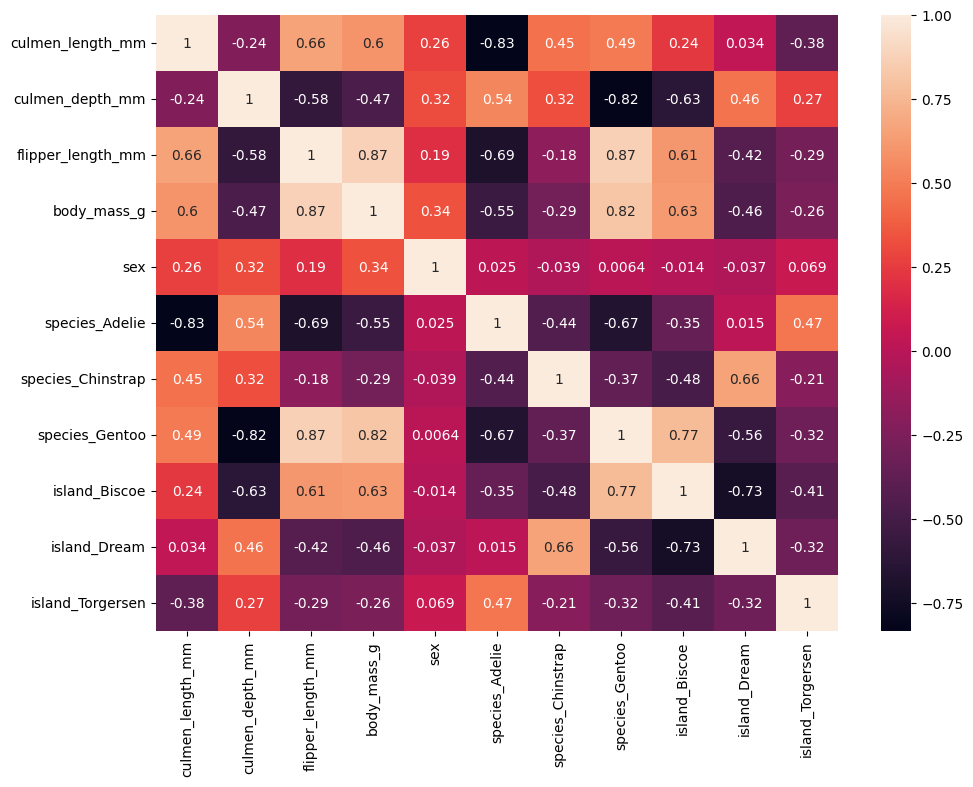

In [26]:
plt.figure(figsize=(11,8))
sb.heatmap(df_main.corr(),annot =True)

Getting the Dependent and Independent Variables

In [27]:
df_main.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.10000,18.70000,181.000000,3750.000000,2,1,0,0,0,0,1
1,39.50000,17.40000,186.000000,3800.000000,1,1,0,0,0,0,1
2,40.30000,18.00000,195.000000,3250.000000,1,1,0,0,0,0,1
3,43.92193,17.15117,200.915205,4201.754386,3,1,0,0,0,0,1
4,36.70000,19.30000,193.000000,3450.000000,1,1,0,0,0,0,1


In [28]:
y  = df_main['body_mass_g']
y

0      3750.000000
1      3800.000000
2      3250.000000
3      4201.754386
4      3450.000000
          ...     
339    4201.754386
340    4850.000000
341    5750.000000
342    5200.000000
343    5400.000000
Name: body_mass_g, Length: 344, dtype: float64

In [29]:
x=df_main.drop(columns  = ['body_mass_g'] , axis=1)
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.10000,18.70000,181.000000,2,1,0,0,0,0,1
1,39.50000,17.40000,186.000000,1,1,0,0,0,0,1
2,40.30000,18.00000,195.000000,1,1,0,0,0,0,1
3,43.92193,17.15117,200.915205,3,1,0,0,0,0,1
4,36.70000,19.30000,193.000000,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,3,0,0,1,1,0,0
340,46.80000,14.30000,215.000000,1,0,0,1,1,0,0
341,50.40000,15.70000,222.000000,2,0,0,1,1,0,0
342,45.20000,14.80000,212.000000,1,0,0,1,1,0,0


Scaling the Data

In [30]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()
X_scaled= pd.DataFrame(scale.fit_transform(x),columns =x.columns)
X_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,0.254545,0.666667,0.152542,0.666667,1.0,0.0,0.0,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.333333,1.0,0.0,0.0,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.333333,1.0,0.0,0.0,0.0,0.0,1.0
3,0.429888,0.482282,0.490088,1.000000,1.0,0.0,0.0,0.0,0.0,1.0
4,0.167273,0.738095,0.355932,0.333333,1.0,0.0,0.0,0.0,0.0,1.0


Split the Given data to Training as well as Testing data

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

Printing Testing as well as Training data shapes

In [41]:
X_train.shape

(240, 10)

In [42]:
X_train.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
31,0.185455,0.595238,0.101695,0.666667,1.0,0.0,0.0,0.0,1.0,0.0
245,0.509091,0.238095,0.728814,0.666667,0.0,0.0,1.0,1.0,0.0,0.0
277,0.487273,0.226190,0.813559,0.666667,0.0,0.0,1.0,1.0,0.0,0.0
165,0.723636,0.595238,0.491525,0.666667,0.0,1.0,0.0,0.0,1.0,0.0
250,0.552727,0.261905,0.847458,0.666667,0.0,0.0,1.0,1.0,0.0,0.0


In [43]:
y_train.shape

(240,)

In [44]:
y_train.head()

31     3900.0
245    5100.0
277    5000.0
165    4050.0
250    5250.0
Name: body_mass_g, dtype: float64

In [45]:
X_test.shape

(104, 10)

In [46]:
X_test.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
194,0.683636,0.714286,0.406780,0.666667,0.0,1.0,0.0,0.0,1.0,0.0
157,0.476364,0.559524,0.440678,0.333333,0.0,1.0,0.0,0.0,1.0,0.0
225,0.523636,0.047619,0.644068,0.333333,0.0,0.0,1.0,1.0,0.0,0.0
208,0.476364,0.416667,0.322034,0.333333,0.0,1.0,0.0,0.0,1.0,0.0
318,0.592727,0.154762,0.525424,0.333333,0.0,0.0,1.0,1.0,0.0,0.0


In [47]:
y_test.shape

(104,)

In [48]:
y_test.head()

194    3550.0
157    3950.0
225    4550.0
208    3250.0
318    4625.0
Name: body_mass_g, dtype: float64